In [31]:
#get dependencies
import seaborn as sns
import time
from itertools import combinations 
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
import os
from numpy import array
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection import KFold
#load the dataframe
all_state = pd.read_csv("allstate_sample.csv")

(10357, 133)


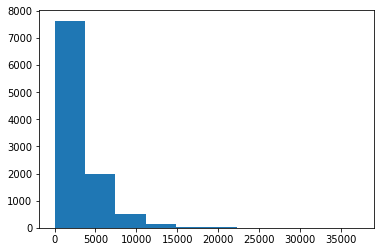

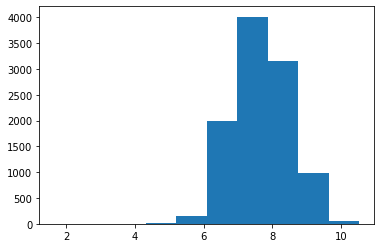

count    10357.000000
mean         7.676099
std          0.814671
min          1.658228
25%          7.083925
50%          7.645795
75%          8.248995
max         10.523178
Name: loss, dtype: float64

In [2]:
print(all_state.shape)
#show distribution of lost 
plt.hist(all_state['loss'])
plt.show()
#distribution is right skewwed, not normal
#does not matter with naive bayes
all_state.dtypes
#only cat1 through cat116 are type object
#drop unamed:0 and id
all_state = all_state.drop(['Unnamed: 0','id'],axis=1)
all_state.head()
#try logging the loss then plot
plt.hist(np.log(all_state['loss']))
plt.show()
#try taking the log loss and see what happens
np.log(all_state['loss']).describe()

In [3]:
all_state.iloc[:,115]
#create range from 0 to 115 for chosing categorial variables
#how should you bin the responses though..?
#im going to start with a binary classifier first
#make function to bin, might need this later
def bin_loss_all_state(df,col_to_cut,col_name,ranges,labels):
    df[col_name] = pd.cut(df[col_to_cut],ranges,labels = labels)
    response = df[col_name]
    return(response)   

In [4]:
#create a binary response to test
all_state["BinLoss1"] = pd.cut(all_state['loss'], [0,2000,100000], labels = ["Low", "High"])
all_state.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,BinLoss1
0,A,A,A,A,B,A,A,A,A,A,...,0.992293,0.33372,0.42289,0.60401,0.797841,0.785706,0.189489,0.798932,1496.42,Low
1,A,B,A,B,A,A,A,A,B,A,...,0.317274,0.27797,0.32128,0.24355,0.180456,0.178698,0.304350,0.383475,3631.23,High
2,A,B,A,B,A,A,A,A,B,A,...,0.266569,0.60087,0.58529,0.20496,0.254180,0.250169,0.509999,0.740503,1599.79,Low
3,A,B,A,A,A,A,A,A,B,B,...,0.363768,0.58354,0.44352,0.39599,0.341813,0.352251,0.339244,0.236627,9270.33,High
4,A,B,A,A,A,A,A,A,A,A,...,0.646277,0.25918,0.49790,0.61459,0.614915,0.601984,0.808455,0.221004,2790.16,High


In [5]:
#get counts of low and high column
all_state['BinLoss1'].value_counts()
#its about 50/50

High    5414
Low     4943
Name: BinLoss1, dtype: int64

In [12]:
#we are going to build  a multinomialNB classigier one feature at time
#for each feature we will select randomly, and get an accuracy score, classes are unbalanced,
accuracy_rate =  []
missclass_rate = []
for i in range(1,116):
    #store random selection of variables
    selection = list(np.random.choice(range(1,116),size=i,replace=False))
    #get the design matrix 
    X = all_state.iloc[:,selection]
    #encode the cateogorival variables
    encoder = preprocessing.OneHotEncoder()
    encoder.fit(X)
    X_encoded = encoder.transform(X) ##this is not an array yet
    #fit the classifier
    clf = MultinomialNB()
    clf.fit(X_encoded.toarray(),all_state['BinLoss1'])
    #predict and get accuracy
    predictions = clf.predict(X_encoded.toarray())
    #get accuracy rate
    accuracy = np.mean(predictions == all_state['BinLoss1'])
    misclass = np.mean(predictions != all_state['BinLoss1'])
    #add to each
    accuracy_rate.append(accuracy)
    missclass_rate.append(misclass)
    if i%5 == 0:
        print(time.ctime())
    else:
        pass

            

Sat Sep 14 21:02:32 2019
Sat Sep 14 21:02:32 2019
Sat Sep 14 21:02:33 2019
Sat Sep 14 21:02:34 2019
Sat Sep 14 21:02:35 2019
Sat Sep 14 21:02:39 2019
Sat Sep 14 21:02:41 2019
Sat Sep 14 21:02:43 2019
Sat Sep 14 21:02:47 2019
Sat Sep 14 21:02:52 2019
Sat Sep 14 21:02:57 2019
Sat Sep 14 21:03:02 2019
Sat Sep 14 21:03:07 2019
Sat Sep 14 21:03:13 2019
Sat Sep 14 21:03:17 2019
Sat Sep 14 21:03:25 2019
Sat Sep 14 21:03:29 2019
Sat Sep 14 21:03:34 2019
Sat Sep 14 21:03:40 2019
Sat Sep 14 21:03:46 2019
Sat Sep 14 21:03:51 2019
Sat Sep 14 21:03:59 2019
Sat Sep 14 21:04:07 2019


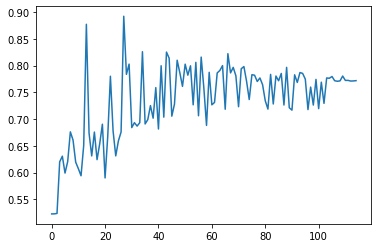

In [13]:
plt.plot(accuracy_rate)
plt.show()

In [6]:
#try taking the log off loss and see what happens too
all_state['log_loss'] = np.log(all_state['loss'])
all_state['log_loss'].describe()
#try binning log_loss
all_state["BinLogLoss"] = pd.cut(all_state['log_loss'], [0,8,10.6], labels = ["Low", "High"])
all_state['BinLogLoss'].value_counts()

Low     6724
High    3633
Name: BinLogLoss, dtype: int64

Sat Sep 14 21:06:04 2019
Sat Sep 14 21:06:07 2019
Sat Sep 14 21:06:20 2019
Sat Sep 14 21:06:34 2019
Sat Sep 14 21:07:03 2019


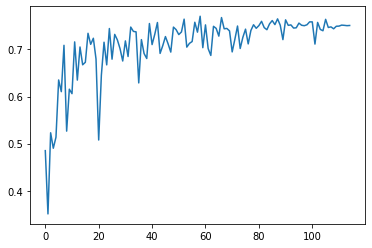

In [16]:
#testing with the log loss
#we are going to build  a multinomialNB classigier one feature at time
#for each feature we will select randomly, and get an accuracy score, classes are unbalanced,
accuracy_rate =  []
missclass_rate = []
for i in range(1,116):
    #store random selection of variables
    selection = list(np.random.choice(range(1,116),size=i,replace=False))
    #get the design matrix 
    X = all_state.iloc[:,selection]
    #encode the cateogorival variables
    encoder = preprocessing.OneHotEncoder()
    encoder.fit(X)
    X_encoded = encoder.transform(X) ##this is not an array yet
    #fit the classifier
    clf = MultinomialNB()
    clf.fit(X_encoded.toarray(),all_state['BinLoss1'])
    #predict and get accuracy
    predictions = clf.predict(X_encoded.toarray())
    #get accuracy rate
    accuracy = np.mean(predictions == all_state['BinLogLoss'])
    misclass = np.mean(predictions != all_state['BinLogLoss'])
    #add to each
    accuracy_rate.append(accuracy)
    missclass_rate.append(misclass)
    if i%20 == 0:
        print(time.ctime())
plt.plot(accuracy_rate)
plt.show()

In [7]:
#LOG LOSSSSSSS test
#we are going to build  a multinomialNB classigier one feature at time and go through a certain number of models
#for each feature we will select randomly, and get an accuracy score, classes are unbalanced,
#note this takes a while to run
#tuning parameters
import warnings
warnings.filterwarnings('ignore')
model_range = range(1,500)
var_range = range(5,50)
var_range_selection = range(1,116)
upper_bounds_bin_low = np.linspace(6,8.2,num=12)
bin_range = range(1,10)
#new results
accuracy_scores = []
misclass_scores = []
selection_variables = []
num_variables = []
upper_bound_low_cat = []
iteration_number = []
for itr,i in enumerate(var_range):
    if itr%5 == 0:
        print(itr,time.ctime())
    if i < 20:
        #get multiple models of each
        for k in model_range:
            #store random selection of variables
            selection = list(np.random.choice(var_range_selection,size=i,replace=False))
            #get the design matrix 
            X = all_state.iloc[:,selection]
            #encode the cateogorival variables
            encoder = preprocessing.OneHotEncoder()
            encoder.fit(X)
            X_encoded = encoder.transform(X) ##this is not an array yet
            for j in bin_range:
                #create first bound for low
                upper_bound = upper_bounds_bin_low[j]
                low_interval = [0,upper_bound,12]
                #create new binned response
                response_1 = bin_loss_all_state(all_state,'log_loss','BinLogLoss',low_interval,["Low", "High"])
                #fit the classifier
                clf = MultinomialNB()
                clf.fit(X_encoded.toarray(),response_1)
                #predict and get accuracy
                predictions = clf.predict(X_encoded.toarray())
                #get accuracy rate
                accuracy = np.mean(predictions == response_1)
                misclass = np.mean(predictions != response_1)
                #add results
                accuracy_scores.append(accuracy)
                misclass_scores.append(misclass)
                selection_variables.append(selection)
                num_variables.append(i)
                upper_bound_low_cat.append(upper_bound)
                iteration_number.append(itr)
    #now use elif to go through a different threshold of variables
    elif i < 40:
        #get multiple models of each
        for k in model_range:
            #store random selection of variables
            selection = list(np.random.choice(var_range_selection,size=i,replace=False))
            #get the design matrix 
            X = all_state.iloc[:,selection]
            #encode the cateogorival variables
            encoder = preprocessing.OneHotEncoder()
            encoder.fit(X)
            X_encoded = encoder.transform(X) ##this is not an array yet
            for j in bin_range:
                #create first bound for low
                upper_bound = upper_bounds_bin_low[j]
                low_interval = [0,upper_bound,12]
                #create new binned response
                response_1 = bin_loss_all_state(all_state,'log_loss','BinLogLoss',low_interval,["Low", "High"])
                #fit the classifier
                clf = MultinomialNB()
                clf.fit(X_encoded.toarray(),response_1)
                #predict and get accuracy
                predictions = clf.predict(X_encoded.toarray())
                #get accuracy rate
                accuracy = np.mean(predictions == response_1)
                misclass = np.mean(predictions != response_1)
                #add results
                accuracy_scores.append(accuracy)
                misclass_scores.append(misclass)
                selection_variables.append(selection)
                num_variables.append(i)
                upper_bound_low_cat.append(upper_bound)
                iteration_number.append(itr)
    #now use elif to go through a different threshold of variables
    elif i < 60:
        #get multiple models of each
        for k in model_range:
            #store random selection of variables
            selection = list(np.random.choice(var_range_selection,size=i,replace=False))
            #get the design matrix 
            X = all_state.iloc[:,selection]
            #encode the cateogorival variables
            encoder = preprocessing.OneHotEncoder()
            encoder.fit(X)
            X_encoded = encoder.transform(X) ##this is not an array yet
            for j in bin_range:
                #create first bound for low
                upper_bound = upper_bounds_bin_low[j]
                low_interval = [0,upper_bound,12]
                #create new binned response
                response_1 = bin_loss_all_state(all_state,'log_loss','BinLogLoss',low_interval,["Low", "High"])
                #fit the classifier
                clf = MultinomialNB()
                clf.fit(X_encoded.toarray(),response_1)
                #predict and get accuracy
                predictions = clf.predict(X_encoded.toarray())
                #get accuracy rate
                accuracy = np.mean(predictions == response_1)
                misclass = np.mean(predictions != response_1)
                #add results
                accuracy_scores.append(accuracy)
                misclass_scores.append(misclass)
                selection_variables.append(selection)
                num_variables.append(i)
                upper_bound_low_cat.append(upper_bound)
                iteration_number.append(itr)
    #now use elif to go through a different threshold of variables
    else:
        #get multiple models of each
        for k in model_range:
            #store random selection of variables
            selection = list(np.random.choice(var_range_selection,size=i,replace=False))
            #get the design matrix 
            X = all_state.iloc[:,selection]
            #encode the cateogorival variables
            encoder = preprocessing.OneHotEncoder()
            encoder.fit(X)
            X_encoded = encoder.transform(X) ##this is not an array yet
            for j in bin_range:
                #create first bound for low
                upper_bound = upper_bounds_bin_low[j]
                low_interval = [0,upper_bound,12]
                #create new binned response
                response_1 = bin_loss_all_state(all_state,'log_loss','BinLogLoss',low_interval,["Low", "High"])
                #fit the classifier
                clf = MultinomialNB()
                clf.fit(X_encoded.toarray(),response_1)
                #predict and get accuracy
                predictions = clf.predict(X_encoded.toarray())
                #get accuracy rate
                accuracy = np.mean(predictions == response_1)
                misclass = np.mean(predictions != response_1)
                #add results
                accuracy_scores.append(accuracy)
                misclass_scores.append(misclass)
                selection_variables.append(selection)
                num_variables.append(i)
                upper_bound_low_cat.append(upper_bound)
                iteration_number.append(itr)
                

0 Sun Sep 15 00:40:14 2019
5 Sun Sep 15 00:51:02 2019
10 Sun Sep 15 01:07:54 2019
15 Sun Sep 15 01:23:23 2019
20 Sun Sep 15 01:40:01 2019
25 Sun Sep 15 01:58:49 2019
30 Sun Sep 15 02:17:40 2019
35 Sun Sep 15 02:37:55 2019
40 Sun Sep 15 02:59:43 2019


In [70]:
#save the data in df
all_state_models = pd.DataFrame()
all_state_models['iteration_number'] = iteration_number
all_state_models['num_variables'] = num_variables
all_state_models['selection_variables'] = selection_variables
all_state_models['upper_bound_low_cat'] = np.round(upper_bound_low_cat,decimals=2)
all_state_models['accuracy_scores'] = accuracy_scores
all_state_models['misclass_scores'] = misclass_scores
all_state_models.to_csv("all_state_models_NB.csv")
all_state_models.head(10)



,iteration_number,num_variables,selection_variables,upper_bound_low_cat,accuracy_scores,misclass_scores
0,0,5,"[13, 28, 20, 11, 17]",6.2,0.977117,0.022883
1,0,5,"[13, 28, 20, 11, 17]",6.4,0.951917,0.048083
2,0,5,"[13, 28, 20, 11, 17]",6.6,0.909530,0.090470
3,0,5,"[13, 28, 20, 11, 17]",6.8,0.855267,0.144733
4,0,5,"[13, 28, 20, 11, 17]",7.0,0.784107,0.215893
5,0,5,"[13, 28, 20, 11, 17]",7.2,0.703582,0.296418
6,0,5,"[13, 28, 20, 11, 17]",7.4,0.614657,0.385343
7,0,5,"[13, 28, 20, 11, 17]",7.6,0.599884,0.400116
8,0,5,"[13, 28, 20, 11, 17]",7.8,0.665251,0.334749
9,0,5,"[19, 45, 44, 114, 18]",6.2,0.977117,0.022883


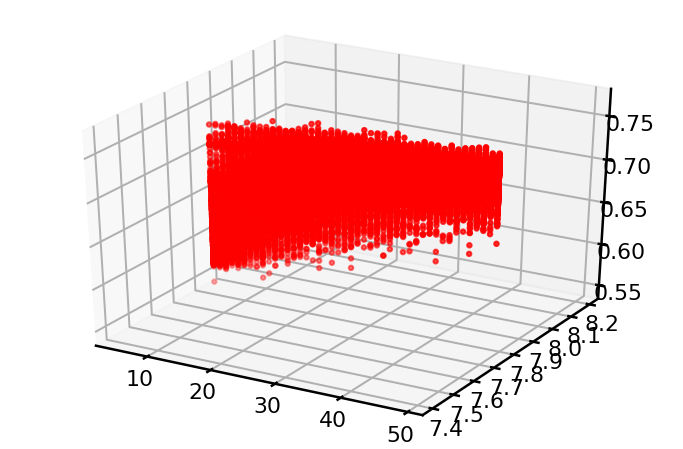

In [76]:
from mpl_toolkits.mplot3d import Axes3D
index_6_2 = all_state_models["upper_bound_low_cat"] == 7.8
all_state_models_6_2 = all_state_models[index_6_2]
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(all_state_models_6_2['num_variables'].values, all_state_models_6_2['upper_bound_low_cat'].values
           , all_state_models_6_2['accuracy_scores'].values,c='r')
plt.show()

In [77]:
#get distributions for logloss at 7.8
#try taking the log off loss and see what happens too
all_state['log_loss'] = np.log(all_state['loss'])
all_state['log_loss'].describe()
#try binning log_loss
all_state["BinLogLoss"] = pd.cut(all_state['log_loss'], [0,7.8,10.6], labels = ["Low", "High"])
all_state['BinLogLoss'].value_counts()
#low bin log loss will 7.8

Low     5896
High    4461
Name: BinLogLoss, dtype: int64

/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/anaconda3/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
/anaconda3/lib/python3.7/site-packages/IPython/core/pyla

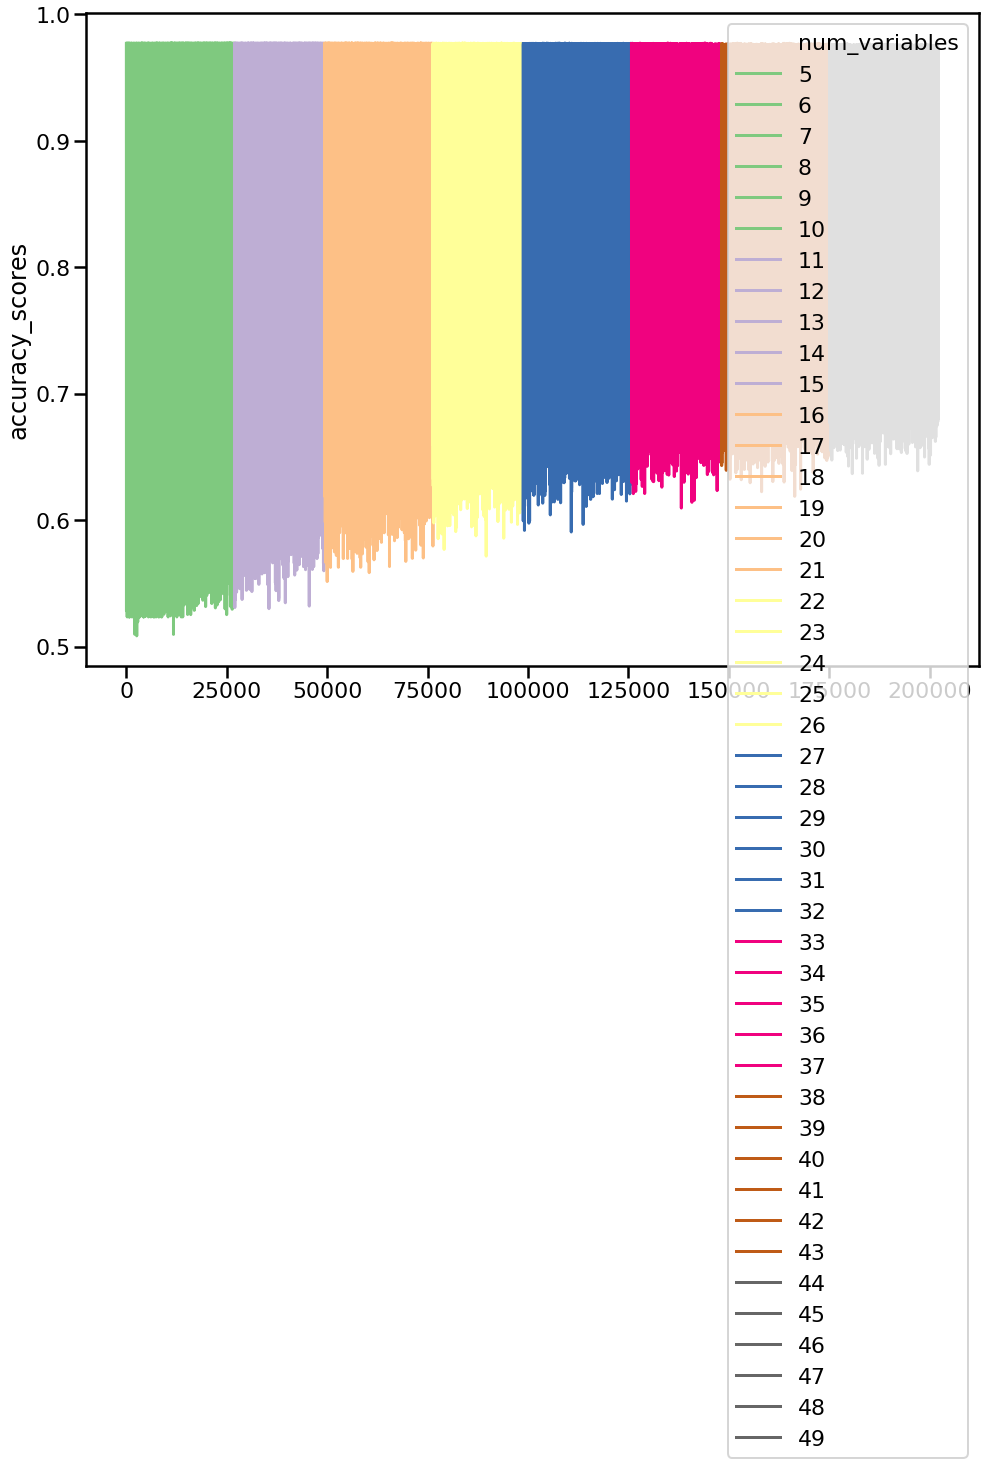

In [21]:
sns.set_context("poster")#paper, poster, talk
a4_dims = (16,12)
plt.figure(figsize=a4_dims)

sns.lineplot(x=all_state_models.index, y='accuracy_scores',hue="num_variables", data=all_state_models, palette="Accent", legend = 'full')# brief, full or False
# plt.legend(title='Legend', loc='upper left', labels=['5','6','7','8'])

In [41]:
#what do the does the final accuracy converge to 
print(np.max(accuracy_rate_matrix_log,axis=0))
#get contingency tables for each log_loss_bin
for j in range(1,10):
    #create first bound for low
    upper_bound = j
    low_interval = [0,upper_bound,12]
    #create new binned response
    response_1 = bin_loss_all_state(all_state,'log_loss','BinLogLoss',low_interval,["Low", "High"])
    print(response_1.value_counts())
#for log loss bin, lets try varying the upper bound in the low category from 6 to 8, in steps of 0.25

[1.         0.99990345 0.99990345 0.99971034 0.99893792 0.98822053
 0.79125229 0.78623153 0.94969586 0.        ]
High    10357
Low         0
Name: BinLogLoss, dtype: int64
High    10356
Low         1
Name: BinLogLoss, dtype: int64
High    10356
Low         1
Name: BinLogLoss, dtype: int64
High    10354
Low         3
Name: BinLogLoss, dtype: int64
High    10346
Low        11
Name: BinLogLoss, dtype: int64
High    10235
Low       122
Name: BinLogLoss, dtype: int64
High    8121
Low     2236
Name: BinLogLoss, dtype: int64
Low     6724
High    3633
Name: BinLogLoss, dtype: int64
Low     9777
High     580
Name: BinLogLoss, dtype: int64


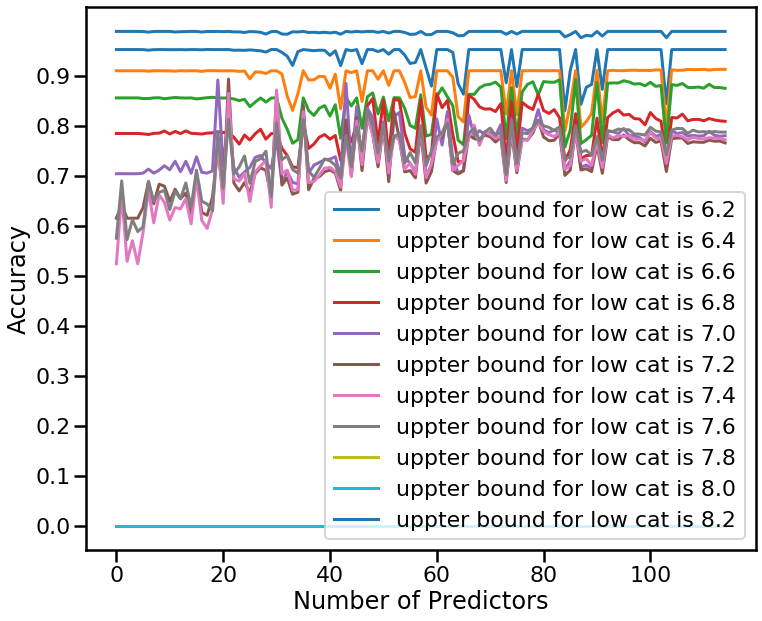

In [78]:
#LOG LOSSSSSSS, again
#but this time tuning the upper bounds for the low category
accuracy_rate_matrix_log =  np.zeros(shape = (115,12))
missclass_rate_matrix_log = np.zeros(shape = (115,12))
for i in range(1,116):
    #store random selection of variables
    selection = list(np.random.choice(range(1,116),size=i,replace=False))
    #get the design matrix 
    X = all_state.iloc[:,selection]
    #encode the cateogorival variables
    encoder = preprocessing.OneHotEncoder()
    encoder.fit(X)
    X_encoded = encoder.transform(X) ##this is not an array yet
    #go through different bin interavales for low and high
    upper_bounds_bin_low = np.linspace(6,8.2,num=12)
    for j in range(0,10):
        #create first bound for low
        upper_bound = upper_bounds_bin_low[j]
        low_interval = [0,upper_bound,12]
        #create new binned response
        response_1 = bin_loss_all_state(all_state,'log_loss','BinLogLoss',low_interval,["Low", "High"])
        #fit the classifier
        clf = MultinomialNB()
        clf.fit(X_encoded.toarray(),response_1)
        #predict and get accuracy
        predictions = clf.predict(X_encoded.toarray())
        #get accuracy rate
        accuracy = np.mean(predictions == response_1)
        misclass = np.mean(predictions != response_1)
        #add to each, offset because of zero index
        accuracy_rate_matrix_log[i-1][j-1] = accuracy
        missclass_rate_matrix_log[i-1][j-1] = misclass
plt.figure(figsize=(12,10))
for eek in range(1,12):
    plt.plot(accuracy_rate_matrix_log[:,eek],label='uppter bound for low cat is %s' % round(upper_bounds_bin_low[eek],4))
plt.yticks(np.arange(0, 1, step=0.1))
plt.xlabel('Number of Predictors')
plt.ylabel('Accuracy')
plt.legend()    
plt.show()
#this is interesting, of all the contours plotted, the red line gives the same accuracy no matter what number
#features is used, what does this mean?
#the top blue line, shows the accuracy of low class of bin range logloss from 0 to 8

[6.  6.2 6.4 6.6 6.8 7.  7.2 7.4 7.6 7.8 8.  8.2]
Low     5896
High    4461
Name: BinLogLoss, dtype: int64


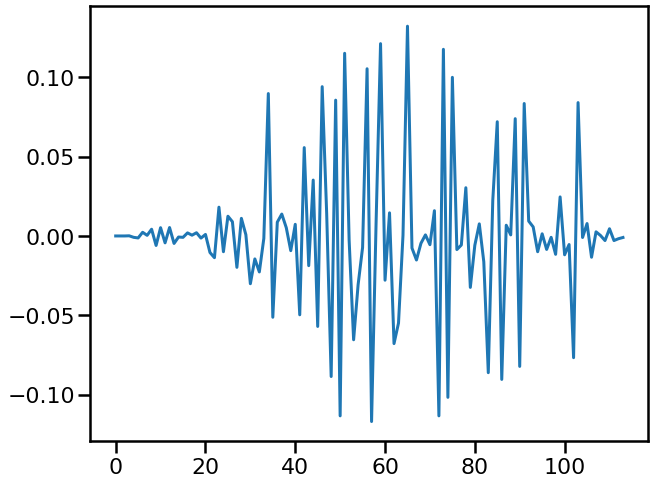

(array([ 30,  32,  35,  41,  45,  48,  50,  53,  54,  57,  60,  62,  63,
        72,  74,  79,  83,  86,  90, 102]),)


In [98]:
print(upper_bounds_bin_low)
#what are the high and low distributions around 7.7
#recall the initial distribution suggested that there more low losses than high losses,
#i don't know what this means, but if we can find a class balance where there are siginigicantly more 
#of 1 class
low_interval = [0,7.8,12]
#create new binned response
response_1 = bin_loss_all_state(all_state,'log_loss','BinLogLoss',low_interval,["Low", "High"])
print(response_1.value_counts())
#im going to go with log_loss range of [0 to 7.7]
#where do we start losing accuracy after so many features
plt.figure(figsize=(10,8))
plt.plot(np.diff(accuracy_rate_matrix_log[:,4]))
plt.show()
#i want the index number that had the largest spike, find it
#since i took the first order difference, i need to add 1 back to get the number of features to use
print(np.where((np.diff(accuracy_rate_matrix_log[:,4]) < -0.02) == True))
#first is at 9, and the seconds is 19 add, ill choose 19 add 1 thats 20
#before doing that, lets estimate the moment for the distriibution of accuracy for a 20 feature model NaiveBayes
#this will give us upper and lower bounds for the accuracy for the model
#update, lets sets the bin log loss to 7.7, and features to 30

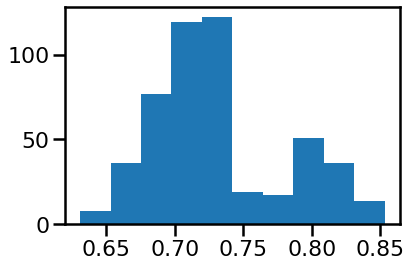

In [99]:
#estimate first moment of accuracy for 30 feature NB classifier
#this takes a while to run as well
#get distribution of accuracy for models with 7 predictors, will repeat 1000 times
accuracy_30_values = []
misclass_30_values = []
selection_variables =[]
for i in range(1,500):
    #get random sample of 30 predictors
    selection = list(np.random.choice(range(1,116),size=30,replace=False))
    selection_variables.append(selection)
    #get the design matrix 
    X = all_state.iloc[:,selection]
    #encode the cateogorival variables
    encoder = preprocessing.OneHotEncoder()
    encoder.fit(X)
    X_encoded = encoder.transform(X) ##this is not an array yet
    #fit the classifier
    clf = MultinomialNB()
    clf.fit(X_encoded.toarray(),response_1)
    #predict and get accuracy
    predictions = clf.predict(X_encoded.toarray())
    #get accuracy rate
    accuracy_30 = np.mean(predictions == response_1)
    misclass_30 = np.mean(predictions != response_1)
    #add to list
    accuracy_30_values.append(accuracy_30)
    misclass_30_values.append(misclass_30_values)
plt.hist(accuracy_30_values)
plt.show()
#the distribution is bimodal! what does this mean?
#the probability of observing a 30 feature model given the data follows this distribution
#so we would expect models containing 30 features to predict this way
#we need to cross validate this model

In [100]:
#best model discovered with only 30 variables gave 87.9 %
#this was even with two equal classes
#not this was after logging the bin loss
np.max(accuracy_30_values)

0.8530462489137781

In [101]:
#identifiy selection of features that give the highest accuracy, given the reponse
optimized_features = selection_variables[np.argmax(accuracy_30_values)]
#allocate matrices
encoder = preprocessing.OneHotEncoder()
encoder.fit(all_state.iloc[:,optimized_features])
X_optimized_encoded = encoder.transform(all_state.iloc[:,optimized_features]) #this is not an array yet
#cast X_optimized_encoded as array
X = X_optimized_encoded.toarray()
y = response_1
#begin CV
cv = KFold(n_splits=10, random_state=45, shuffle=False)
cv_accuracy_scores = []
cv_misclass_scores = []
for train_index, test_index in cv.split(X):
    #assign training and testing matrices
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.iloc[train_index], y.iloc[test_index]
    #fit the classifier
    clf = MultinomialNB()
    clf.fit(X_train,y_train)
    #predict and get accuracy
    cv_predictions = clf.predict(X_test)
    #get accuracy rate
    cv_accuracy_38 = np.mean(cv_predictions == y_test)
    cv_misclass_38 = np.mean(cv_predictions != y_test)
    #add
    cv_accuracy_scores.append(cv_accuracy_38)
    cv_misclass_scores.append(cv_misclass_38)

In [102]:
print(cv_accuracy_scores)
print(np.mean(cv_accuracy_scores))
#accuracy for 30 variables, and 10 cv, and bin log loss upper bound is 7.8 is 69%




[0.7007722007722008, 0.6959459459459459, 0.6824324324324325, 0.6785714285714286, 0.6882239382239382, 0.6988416988416989, 0.7027027027027027, 0.6917874396135266, 0.6946859903381642, 0.7140096618357488]
0.6947973439277788


In [168]:
#begin KNN
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score
#use continuous features from all state
all_state.head()
cont_variables = [vars for vars in all_state.columns if 'cont' in vars]
cont_variables
#lets try a first stab at knn using all 14
#but first we need to standardize the cont variables
all_state_cont = all_state[cont_variables]
scaler = StandardScaler()  
scaler.fit(all_state_cont)
all_state_cont_scaled = scaler.transform(all_state_cont)
#plt.hist(all_state_cont_scaled[:,3])
#plt.show()




In [115]:
#fit the classifier
classifier = KNeighborsClassifier(n_neighbors=5, weights = 'uniform', algorithm = 'kd_tree')  
classifier.fit(all_state_cont_scaled, response_1)
y_pred = classifier.predict(all_state_cont_scaled)  
print(pd.crosstab(y_pred, response_1))
print("accuracy: {}".format(round(accuracy_score(y_pred, response_1)*100)), "%")
#with the distance optition, onle 6 points are actually classified

BinLogLoss   Low  High
row_0                 
High        1277  2639
Low         4619  1822
accuracy: 70.0 %


In [119]:
#write knn function that takes in design matrix and response, the num neighbors and the
#minkowski distance parameter and returns accuracy
def knn(X,y,n,p):
    #fit the classifier
    classifier = KNeighborsClassifier(n_neighbors=n, weights = 'uniform', algorithm = 'kd_tree',p=p)  
    classifier.fit(X, y)
    y_pred = classifier.predict(X)
    return(accuracy_score(y_pred,y))
#test function
print(knn(all_state_cont_scaled,response_1,5,3))
#function works
    

0.7045476489330887


In [117]:
all_state_cont_scaled.shape

(10357, 14)

In [134]:
#store results
num_variables = []
selected_variables = []
model_number = []
num_neighbors = []
accuracy_knn = []

#loop through number of features
for itr, i in enumerate(range(1,15)):
    if itr%3 == 0:
        print(itr,time.ctime())
    #for through certain number of models
    for k in range (1,250):
        #go through number of neighbors
        for neigh in range(2,6):
            #store random seletion of variables
            selection = np.random.choice(range(0,all_state_cont_scaled.shape[1]),size=i,replace=False)
            #get variables from standard
            X = all_state_cont_scaled[:,selection]
            y = response_1
            #get accuracy, use squared distance
            accuracy = knn(X,y,neigh,2)
            #store values
            num_variables.append(i)
            selected_variables.append(selection)
            model_number.append(k)
            num_neighbors.append(neigh)
            accuracy_knn.append(accuracy)
            
 

0 Mon Sep 16 12:50:28 2019
3 Mon Sep 16 13:01:19 2019
6 Mon Sep 16 13:13:07 2019
9 Mon Sep 16 13:27:08 2019
12 Mon Sep 16 13:44:15 2019


In [135]:
#create df and save as csv
all_state_models_knn = pd.DataFrame()
all_state_models_knn['num_variables'] = num_variables
all_state_models_knn['selected_variables'] = selected_variables
all_state_models_knn['model_number'] = model_number
all_state_models_knn['num_neighbors']= num_neighbors
all_state_models_knn['accuracy_knn'] = accuracy_knn

all_state_models_knn.to_csv("all_state_models_knn.csv")
all_state_models_knn.head(5)

,num_variables,selected_variables,model_number,num_neighbors,accuracy_knn
0,1,[13],1,2,0.709182
1,1,[8],1,3,0.556918
2,1,[4],1,4,0.499372
3,1,[5],1,5,0.605291
4,1,[9],2,2,0.475910


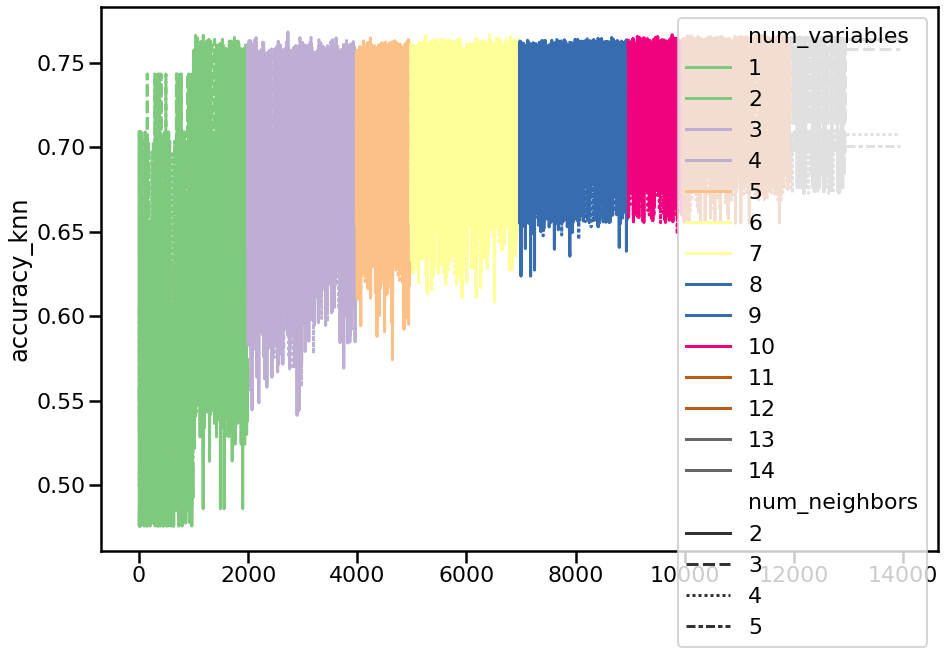

In [137]:
sns.set_context("poster")
a4_dims = (15, 10)
plt.figure(figsize=a4_dims)
sns.lineplot(x=all_state_models_knn.index, y="accuracy_knn",hue="num_variables",style = 'num_neighbors' ,
             data=all_state_models_knn,legend = 'full', palette="Accent")



Text(0.5, 1.0, 'second order difference of averaged accuracy')

<Figure size 432x288 with 0 Axes>

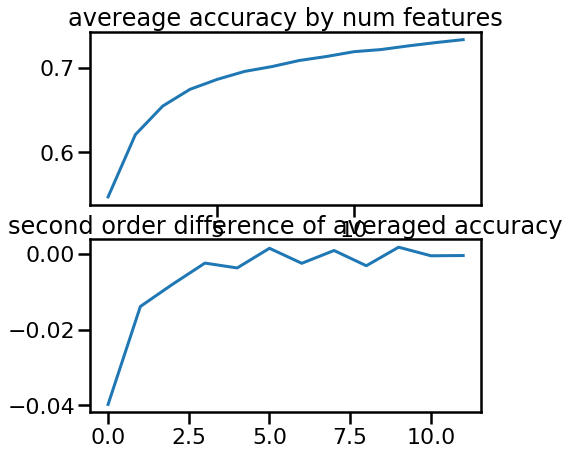

In [165]:
all_state_models_knn.groupby("num_variables").mean()['accuracy_knn']
#get plot of num variables by accuracy, note aggregated
plt.figure(figsize=(6,4))
fig, axs = plt.subplots(2)
fig.set_figheight(7)
fig.set_figwidth(7)
axs[0].plot(all_state_models_knn.groupby("num_variables").mean().index,
         all_state_models_knn.groupby("num_variables").mean()['accuracy_knn'],linestyle="solid")
axs[0].set_title('avereage accuracy by num features')
axs[1].plot(np.diff(all_state_models_knn.groupby("num_variables").mean()['accuracy_knn'],n = 2)
            ,linestyle='solid')
axs[1].set_title('second order difference of averaged accuracy')
#plot first order difference
#five or 6 of the continuous features look pretty good to me, but what 5 or 6

Text(0.5, 1.0, 'second order difference of averaged accuracy')

<Figure size 432x288 with 0 Axes>

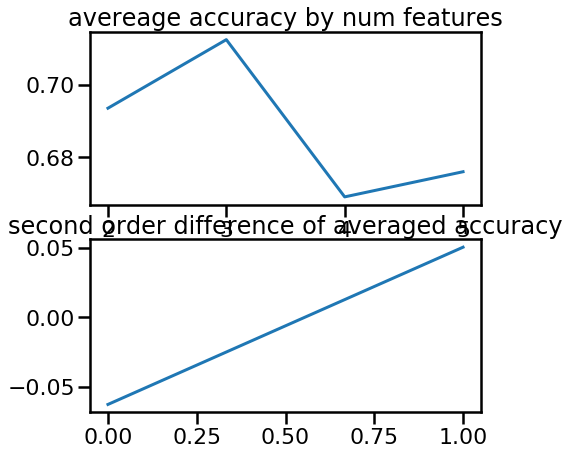

In [167]:
#do it again for the optimal number of neighbors
plt.figure(figsize=(6,4))
fig, axs = plt.subplots(2)
fig.set_figheight(7)
fig.set_figwidth(7)
axs[0].plot(all_state_models_knn.groupby("num_neighbors").mean().index,
         all_state_models_knn.groupby("num_neighbors").mean()['accuracy_knn'],linestyle="solid")
axs[0].set_title('avereage accuracy by num features')
axs[1].plot(np.diff(all_state_models_knn.groupby("num_neighbors").mean()['accuracy_knn'],n = 2)
            ,linestyle='solid')
axs[1].set_title('second order difference of averaged accuracy')
#best neighbors seems to be three!

In [175]:
#lets estimate the distribution of all 5 feature knn models with num neighbors equal to 3, do 1000 times
accuracy_knn_5cont_3neigh = []
variables = []
for i in range(0,700):
    if i%50 == 0:
        print(i,time.ctime())
    #store random seletion of variables
    selection = np.random.choice(range(0,all_state_cont_scaled.shape[1]),size=5,replace=False)
    #get variables from standard
    X = all_state_cont_scaled[:,selection]
    y = response_1
    #get accuracy, use squared distance
    accuracy = knn(X,y,3,2)
    #store values
    accuracy_knn_5cont_3neigh.append(accuracy)
    variables.append(selection)
    
            

0 Mon Sep 16 20:32:58 2019
50 Mon Sep 16 20:33:10 2019
100 Mon Sep 16 20:33:22 2019
150 Mon Sep 16 20:33:35 2019
200 Mon Sep 16 20:33:47 2019
250 Mon Sep 16 20:33:59 2019
300 Mon Sep 16 20:34:11 2019
350 Mon Sep 16 20:34:23 2019
400 Mon Sep 16 20:34:35 2019
450 Mon Sep 16 20:34:47 2019
500 Mon Sep 16 20:34:59 2019
550 Mon Sep 16 20:35:11 2019
600 Mon Sep 16 20:35:23 2019
650 Mon Sep 16 20:35:35 2019


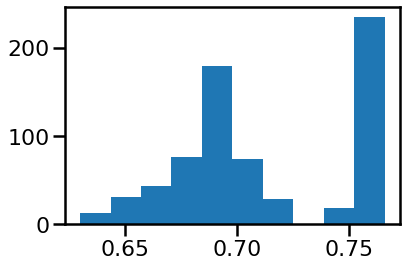

0.7659553924881722


In [177]:
plt.hist(accuracy_knn_5cont_3neigh)
plt.show()
print(np.max(accuracy_knn_5cont_3neigh))

In [188]:
#cross validatidate with the best model
#num features 5, neighbors 3
#get best features
optimized_features = variables[np.argmax(accuracy_knn_5cont_3neigh)]
#allocate matrices
X = all_state_cont_scaled[:,optimized_features]
y = response_1

#begin CV
cv = KFold(n_splits=10, random_state=45, shuffle=False)
cv_accuracy_scores = []
cv_misclass_scores = []
for train_index, test_index in cv.split(X):
    #assign training and testing matrices
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.iloc[train_index], y.iloc[test_index]
    #fit the classifier
    knn_clf_cv = KNeighborsClassifier(n_neighbors=3,p=2)
    knn_clf_cv.fit(X_train,y_train)
    #predict and get accuracy
    cv_predictions = knn_clf_cv.predict(X_test)
    #get accuracy rate
    cv_accuracy = np.mean(cv_predictions == y_test)
    cv_misclass = np.mean(cv_predictions != y_test)
    #add
    cv_accuracy_scores.append(cv_accuracy)
    cv_misclass_scores.append(cv_misclass)
    
print(accuracy_scores)
print(np.mean(accuracy_scores))


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



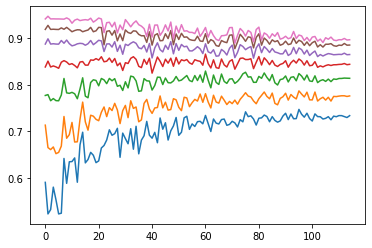

In [26]:
#we are going to build  a multinomialNB classigier one feature at time
#for each feature we will select randomly, and get an accuracy score, classes are unbalanced,
#note this takes a while to run
accuracy_rate_matrix =  np.zeros(shape = (115,10))
missclass_rate_matrix = np.zeros(shape = (115,10))
for i in range(1,116):
    #store random selection of variables
    selection = list(np.random.choice(range(1,116),size=i,replace=False))
    #get the design matrix 
    X = all_state.iloc[:,selection]
    #encode the cateogorival variables
    encoder = preprocessing.OneHotEncoder()
    encoder.fit(X)
    X_encoded = encoder.transform(X) ##this is not an array yet
    #go through different bin interavales for low and high
    accuracy
    for j in range(1,10):
        #create first bound for low
        upper_bound = j*1000
        low_interval = [0,upper_bound,100000]
        #create new binned response
        response_1 = bin_loss_all_state(all_state,'loss','BinLossCat',low_interval,["Low", "High"])
        #fit the classifier
        clf = MultinomialNB()
        clf.fit(X_encoded.toarray(),response_1)
        #predict and get accuracy
        predictions = clf.predict(X_encoded.toarray())
        #get accuracy rate
        accuracy = np.mean(predictions == response_1)
        misclass = np.mean(predictions != response_1)
        #add to each, offset because of zero index
        accuracy_rate_matrix[i-1][j-1] = accuracy
        missclass_rate_matrix[i-1][j-1] = misclass
for eek in range(1,8):
    plt.plot(accuracy_rate_matrix[:,eek])
plt.show()
#it actually looks likes 25 to 30 features might be the optimal number of features to use
#but what features are those?
#lets run through all possible combinations of 25 features, and pick the 25 with highest accuracy
#im not seeing much of a difference between logloss and loss as the response

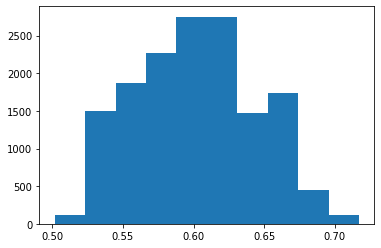

In [27]:
#estimate first moment of accuracy for 7 feature NB classifier
#this takes a while to run as well
#get distribution of accuracy for models with 7 predictors, will repeat 15,000 times
accuracy_7_values = []
misclass_7_values = []
for i in range(1,15000):
    #get random sample of 7 predictors
    selection = list(np.random.choice(range(1,116),size=7,replace=False))
    #get the design matrix 
    X = all_state.iloc[:,selection]
    #encode the cateogorival variables
    encoder = preprocessing.OneHotEncoder()
    encoder.fit(X)
    X_encoded = encoder.transform(X) ##this is not an array yet
    #fit the classifier
    clf = MultinomialNB()
    clf.fit(X_encoded.toarray(),all_state['BinLoss1'])
    #predict and get accuracy
    predictions = clf.predict(X_encoded.toarray())
    #get accuracy rate
    accuracy_7 = np.mean(predictions == all_state['BinLoss1'])
    misclass_7 = np.mean(predictions != all_state['BinLoss1'])
    #add to list
    accuracy_7_values.append(accuracy_7)
    misclass_7_values.append(misclass_7_values)
plt.hist(accuracy_7_values)
plt.show()
#looks prety normal to me?

In [ ]:
plt.hist(misclass_7_values)
plt.show()